<a href="https://colab.research.google.com/github/NastuaBudko/machine_learning/blob/main/%D0%91%D1%83%D0%B4%D0%BA%D0%BE_lab3_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Лабораторна робота №3 Будко А.С. ФІТ 4-8 Варіант 4

# Завдання 1

In [1]:
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler
import pandas as pd
from sklearn.datasets import load_diabetes
import matplotlib.pyplot as plt

1. Вивести перших 5 рядків.

In [2]:
diabetes = load_diabetes()

df = pd.DataFrame(diabetes.data, columns=diabetes.feature_names)

df['target'] = diabetes.target

df.head(5)

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6,target
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019907,-0.017646,151.0
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068332,-0.092204,75.0
2,0.085299,0.050680,0.044451,-0.005670,-0.045599,-0.034194,-0.032356,-0.002592,0.002861,-0.025930,141.0
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022688,-0.009362,206.0
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031988,-0.046641,135.0


2. Перевірити наявність пропусків. У разі виявлення замінити на середнє значення.

In [3]:
print("Кількість пропусків у кожному стовпці:\n", df.isnull().sum())

Кількість пропусків у кожному стовпці:
 age       0
sex       0
bmi       0
bp        0
s1        0
s2        0
s3        0
s4        0
s5        0
s6        0
target    0
dtype: int64


3. Перевірити наявність дублікатів, при виявленні – видалити

In [4]:
print(f"Кількість дублікатів: {df.duplicated().sum()}")

Кількість дублікатів: 0


4. Замінити бінарні ознаки. У стовпчику «стать» спочатку перевірте
унікальні значення.

In [5]:
unique_values = df['sex'].unique()
print("Унікальні значення 'sex':\n", unique_values)

df['sex'] = df['sex'].apply(lambda x: 0 if x < 0 else 1)

print("\nЗначення в стовпці 'sex' після заміни:\n", df['sex'].unique())

Унікальні значення 'sex':
 [ 0.05068012 -0.04464164]

Значення в стовпці 'sex' після заміни:
 [1 0]


5. Перевірити тип даних. При необхідності замінити тип даних на
числовий.

In [6]:
print("Типи даних перед конвертацією:")
print(df.dtypes)


Типи даних перед конвертацією:
age       float64
sex         int64
bmi       float64
bp        float64
s1        float64
s2        float64
s3        float64
s4        float64
s5        float64
s6        float64
target    float64
dtype: object


6. Обчислити кореляцію між прогресом діабету і іншмим ознаками.
Розташувати в порядку спадання.
Побудувати теплову карту кореляції.

bmi    0.586450
s5     0.565883
bp     0.441482
s4     0.430453
s6     0.382483
s1     0.212022
age    0.187889
s2     0.174054
sex    0.043062
s3    -0.394789
Name: target, dtype: float64


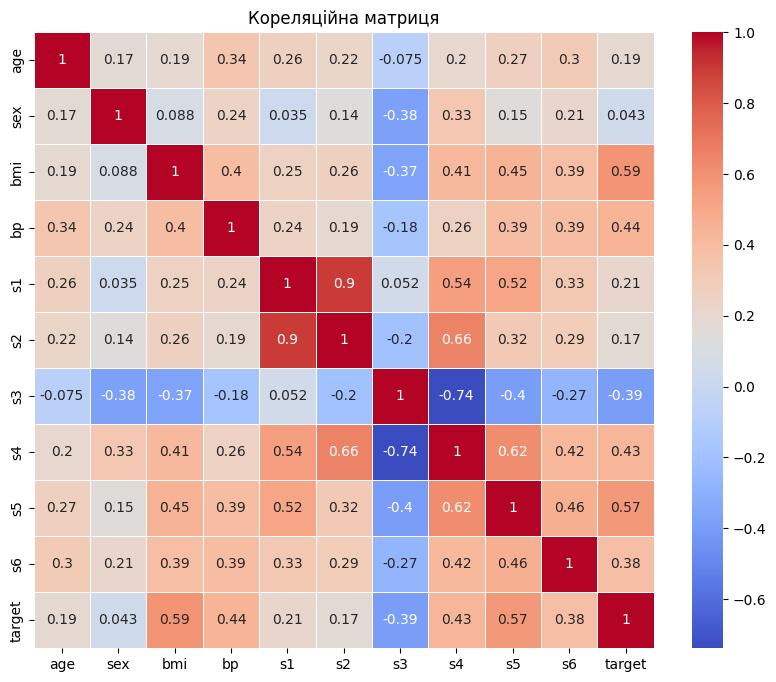

In [7]:
correlations = df.corr()['target'].drop('target').sort_values(ascending=False)
print(correlations)

plt.figure(figsize=(10, 8))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Кореляційна матриця')
plt.show()

7. Масштабувати ознаки.

In [8]:
scaler = StandardScaler()
scaled_features = scaler.fit_transform(df.drop('target', axis=1))

scaled_df = pd.DataFrame(scaled_features, columns=df.columns[:-1])
scaled_df['target'] = df['target']

scaled_df.head()

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6,target
0,0.800500,1.065488,1.297088,0.459841,-0.929746,-0.732065,-0.912451,-0.054499,0.418531,-0.370989,151.0
1,-0.039567,-0.938537,-1.082180,-0.553505,-0.177624,-0.402886,1.564414,-0.830301,-1.436589,-1.938479,75.0
2,1.793307,1.065488,0.934533,-0.119214,-0.958674,-0.718897,-0.680245,-0.054499,0.060156,-0.545154,141.0
3,-1.872441,-0.938537,-0.243771,-0.770650,0.256292,0.525397,-0.757647,0.721302,0.476983,-0.196823,206.0
4,0.113172,-0.938537,-0.764944,0.459841,0.082726,0.327890,0.171178,-0.054499,-0.672502,-0.980568,135.0


8. Поділити дані на тренувальну і тестову вибірки.

In [9]:
X = df.drop('target', axis=1)
y = df['target']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(f'Розмір тренувальної вибірки: {X_train.shape[0]}')
print(f'Розмір тестової вибірки: {X_test.shape[0]}')

Розмір тренувальної вибірки: 353
Розмір тестової вибірки: 89


9. Побудувати модель лінійной регресії і RandomForest регресії на
основі більш корелюючих ознак (підібрати оптимальне число).

In [10]:
correlation_matrix = df.corr()
target_correlation = correlation_matrix['target'].sort_values(ascending=False)

print("Кореляції з цільовою змінною:")
print(target_correlation)

top_features = target_correlation.index[1:6]
print(f"Вибрані ознаки: {top_features}")


lin_reg = LinearRegression()
lin_reg.fit(X_train, y_train)

y_pred_lin = lin_reg.predict(X_test)

mse_lin = mean_squared_error(y_test, y_pred_lin)
print(f"Середня квадратична помилка (Лінійна регресія): {mse_lin}")

rf_reg = RandomForestRegressor(n_estimators=100, random_state=42)
rf_reg.fit(X_train, y_train)

y_pred_rf = rf_reg.predict(X_test)

mse_rf = mean_squared_error(y_test, y_pred_rf)
print(f"Середня квадратична помилка (RandomForest регресія): {mse_rf}")

Кореляції з цільовою змінною:
target    1.000000
bmi       0.586450
s5        0.565883
bp        0.441482
s4        0.430453
s6        0.382483
s1        0.212022
age       0.187889
s2        0.174054
sex       0.043062
s3       -0.394789
Name: target, dtype: float64
Вибрані ознаки: Index(['bmi', 's5', 'bp', 's4', 's6'], dtype='object')
Середня квадратична помилка (Лінійна регресія): 2900.193628493462
Середня квадратична помилка (RandomForest регресія): 2952.0105887640448


10. Вивести коефіцієнт детермінації і середньоквадратичну помилку.


In [11]:
r2_lin = r2_score(y_test, y_pred_lin)

print(f"Лінійна регресія:")
print(f"Коефіцієнт детермінації (R²): {r2_lin}")
print(f"Середньоквадратична помилка (MSE): {mse_lin}")


Лінійна регресія:
Коефіцієнт детермінації (R²): 0.45260276297192314
Середньоквадратична помилка (MSE): 2900.193628493462


11. Побудувати графіки.


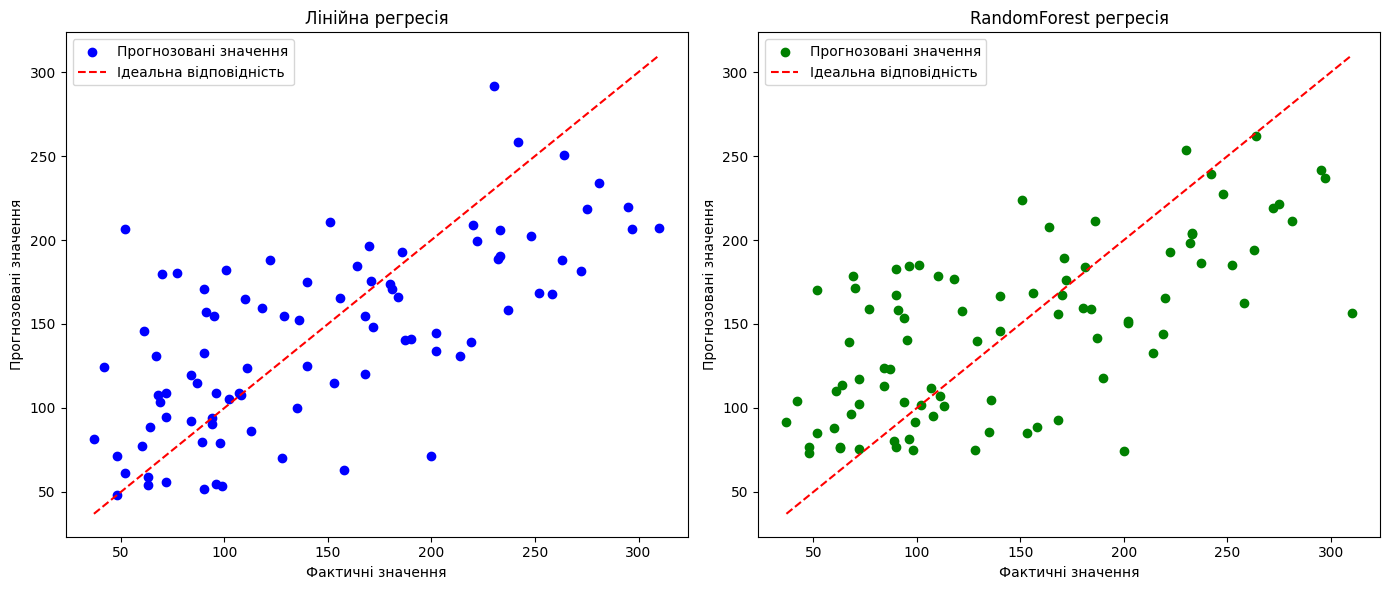

In [12]:
plt.figure(figsize=(14, 6))

plt.subplot(1, 2, 1)
plt.scatter(y_test, y_pred_lin, color='blue', label='Прогнозовані значення')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', linestyle='--', label='Ідеальна відповідність')
plt.xlabel('Фактичні значення')
plt.ylabel('Прогнозовані значення')
plt.title('Лінійна регресія')
plt.legend()

plt.subplot(1, 2, 2)
plt.scatter(y_test, y_pred_rf, color='green', label='Прогнозовані значення')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', linestyle='--', label='Ідеальна відповідність')
plt.xlabel('Фактичні значення')
plt.ylabel('Прогнозовані значення')
plt.title('RandomForest регресія')
plt.legend()

plt.tight_layout()
plt.show()

12. Вивести справжні і прогнозовані значення.

In [13]:
results = pd.DataFrame({'Фактичні значення': y_test,
                        'Прогнозовані значення (Лінійна регресія)': y_pred_lin,
                        'Прогнозовані значення (RandomForest регресія)': y_pred_rf})

results.head()

,Фактичні значення,Прогнозовані значення (Лінійна регресія),Прогнозовані значення (RandomForest регресія)
287,219.0,139.547558,144.00
211,70.0,179.517208,171.58
72,202.0,134.038756,150.72
321,230.0,291.417029,253.71
73,111.0,123.789659,107.19


Висновок: Лінійна регресія в ряді випадків показує значні розбіжності між прогнозованими та фактичними значеннями, наприклад, фактичні значення 287 і 72 прогнозуються як 219.0 та 202.0 відповідно. На відміну від цього, регресія RandomForest демонструє прогнозовані значення, які значно ближчі до фактичних у більшості випадків. Отже, RandomForest забезпечує вищу точність прогнозів у порівнянні з лінійною регресією.

# Завдання 2

In [14]:
import seaborn as sns
import pandas as pd
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Ridge
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

1. Провести попередній аналіз даних за схемою.

In [15]:
california_housing = fetch_california_housing()
df = pd.DataFrame(california_housing.data, columns=california_housing.feature_names)
df['target'] = california_housing.target
df.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,target
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


In [16]:
df.shape

(20640, 9)

In [17]:
print("Кількість пропусків у кожному стовпці:\n", df.isnull().sum())

Кількість пропусків у кожному стовпці:
 MedInc        0
HouseAge      0
AveRooms      0
AveBedrms     0
Population    0
AveOccup      0
Latitude      0
Longitude     0
target        0
dtype: int64


In [18]:
print(f"Кількість дублікатів у датасеті: {df.duplicated().sum()}")

Кількість дублікатів у датасеті: 0


In [19]:
print("Типи даних:")
print(df.dtypes)

Типи даних:
MedInc        float64
HouseAge      float64
AveRooms      float64
AveBedrms     float64
Population    float64
AveOccup      float64
Latitude      float64
Longitude     float64
target        float64
dtype: object


2. Масштабувати ознаки.

In [20]:
scaler = StandardScaler()
scaled_features = scaler.fit_transform(df.drop('target', axis=1))

scaled_df = pd.DataFrame(scaled_features, columns=df.columns[:-1])
scaled_df['target'] = df['target']

scaled_df.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,target
0,2.344766,0.982143,0.628559,-0.153758,-0.974429,-0.049597,1.052548,-1.327835,4.526
1,2.332238,-0.607019,0.327041,-0.263336,0.861439,-0.092512,1.043185,-1.322844,3.585
2,1.782699,1.856182,1.155620,-0.049016,-0.820777,-0.025843,1.038503,-1.332827,3.521
3,0.932968,1.856182,0.156966,-0.049833,-0.766028,-0.050329,1.038503,-1.337818,3.413
4,-0.012881,1.856182,0.344711,-0.032906,-0.759847,-0.085616,1.038503,-1.337818,3.422


3. Поділити дані на тренувальні і тестові.

In [21]:
X = df.drop('target', axis=1)
y = df['target']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(f'Розмір тренувальної вибірки: {X_train.shape[0]}')
print(f'Розмір тестової вибірки: {X_test.shape[0]}')

Розмір тренувальної вибірки: 16512
Розмір тестової вибірки: 4128


4. Побудувати 3 моделі: лін. Регресія, регресія випадковий ліс, Ridge.
Підібрати оптимальні параметри за допомогою GridSeach.


In [22]:
models = {'Linear Regression': LinearRegression(),
          'Random Forest Regressor': RandomForestRegressor(),
          'Ridge Regression': Ridge()}

param_grids = {'Random Forest Regressor': {'n_estimators': [50, 100, 200],
                                           'max_depth': [None, 10, 20],},
               'Ridge Regression': {'alpha': [0.1, 1.0, 10.0]}}

best_models = {}

for name, model in models.items():
  print(f"\nНалаштування параметрів для {name}...")
  if name in param_grids:
    grid_search = GridSearchCV(model, param_grids[name], cv=5, n_jobs=-1)
    grid_search.fit(X_train, y_train)
    best_models[name] = grid_search.best_estimator_
    print(f"Найкращі параметри для {name}: {grid_search.best_params_}")
  else:
     best_models[name] = model.fit(X_train, y_train)
     print(f"{name} не потребує налаштування параметрів.")


Налаштування параметрів для Linear Regression...
Linear Regression не потребує налаштування параметрів.

Налаштування параметрів для Random Forest Regressor...
Найкращі параметри для Random Forest Regressor: {'max_depth': 20, 'n_estimators': 200}

Налаштування параметрів для Ridge Regression...
Найкращі параметри для Ridge Regression: {'alpha': 10.0}


5. Вивести R2 і MSE. Побудувати графіки.

In [23]:
for name, model in best_models.items():
  y_pred = model.predict(X_test)
  mse = mean_squared_error(y_test, y_pred)
  r2 = r2_score(y_test, y_pred)
  print(f"\nОцінка {name}:")
  print(f"Mean Squared Error: {mse:.2f}:")
  print(f"R^2 Score: {r2:.2f}:")



Оцінка Linear Regression:
Mean Squared Error: 0.56:
R^2 Score: 0.58:

Оцінка Random Forest Regressor:
Mean Squared Error: 0.25:
R^2 Score: 0.81:

Оцінка Ridge Regression:
Mean Squared Error: 0.56:
R^2 Score: 0.58:


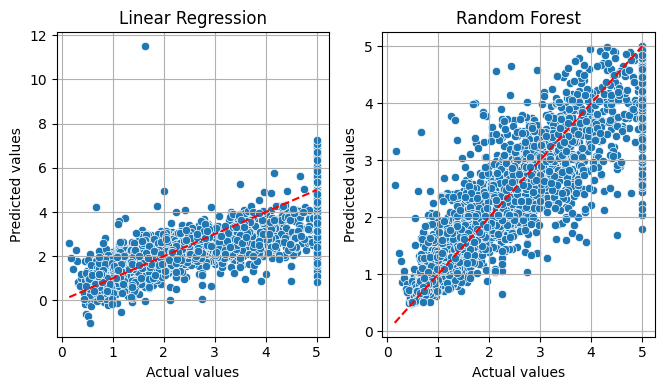

In [24]:
plt.figure(figsize=(10, 4))

plt.subplot(1, 3, 1)
sns.scatterplot(x=y_test, y=best_models['Linear Regression'].predict(X_test))
sns.lineplot(x=[min(y_test), max(y_test)], y=[min(y_test), max(y_test)], color='red', linestyle='--')
plt.xlabel('Actual values')
plt.ylabel('Predicted values')
plt.title('Linear Regression')
plt.grid(True)

plt.subplot(1, 3, 2)
sns.scatterplot(x=y_test, y=best_models['Random Forest Regressor'].predict(X_test))
sns.lineplot(x=[min(y_test), max(y_test)], y=[min(y_test), max(y_test)], color='red', linestyle='--')
plt.xlabel('Actual values')
plt.ylabel('Predicted values')
plt.title('Random Forest')
plt.grid(True)

plt.tight_layout()
plt.show()

6. Вивести справжні і прогнозовані значення

In [25]:
results_df = pd.DataFrame({'Справжні значення': y_test,
                           'Прогноз (Лінійна регресія)': best_models['Linear Regression'].predict(X_test),
                           'Прогноз (RandomForest регресія)': best_models['Random Forest Regressor'].predict(X_test),
                           'Прогноз (Ridge регресія)': best_models['Ridge Regression'].predict(X_test)})

results_df.head(10)

,Справжні значення,Прогноз (Лінійна регресія),Прогноз (RandomForest регресія),Прогноз (Ridge регресія)
20046,0.47700,0.719123,0.489411,0.720285
3024,0.45800,1.764017,0.714344,1.763370
15663,5.00001,2.709659,4.829741,2.704098
20484,2.18600,2.838926,2.570698,2.839409
9814,2.78000,2.604657,2.338504,2.605720
13311,1.58700,2.011754,1.686360,2.012122
7113,1.98200,2.645500,2.362330,2.646395
7668,1.57500,2.168755,1.657487,2.168901
18246,3.40000,2.740746,2.729637,2.734688
5723,4.46600,3.915615,4.899329,3.915170


Висновок: Серед трьох розглянутих моделей регресія RandomForest виявилася найефективнішою для цього завдання, демонструючи вищу точність і стабільність прогнозів. Лінійну та Ridge регресії можна використовувати як базові моделі для оцінки, проте вони мають обмеження при прогнозуванні складних взаємозалежностей.